# 한글 워드 클라우드

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family']='NanumBarunGothic'

In [ ]:
# konlpy 설치
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 34.0 MB/s eta 0:00:00


In [ ]:
text='열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [ ]:
# 한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt=Okt()
kkma=Kkma()
kr=Komoran()

In [ ]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [ ]:
# 품사 태깅(part of speech tagging)
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


* 명사만 추출

In [ ]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# 워드 클라우드

* 한빛출판네트워크>새오나온 책 200권>tag
* tag를 워드클라우드로 만들기

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm import tqdm

In [ ]:
base_url='https://www.hanbit.co.kr'
sub_url='/store/books/new_book_list.html'
url=base_url+sub_url

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
driver.get(url)

<ipython-input-26-d45147ef84c8>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)


In [ ]:
res=requests.get(url)
soup=BeautifulSoup(res.text, 'html.parser')

In [ ]:
lis=soup.select('li.sub_book_list')
len(lis)

20

In [ ]:
li=lis[0]
href=li.find('a')['href']
href

'/store/books/look.php?p_code=B4422381134'

In [ ]:
res=requests.get(base_url+href)
book_soup=BeautifulSoup(res.text, 'html.parser')

In [ ]:
tags=book_soup.select('.tag_area > a')
len(tags)

18

In [ ]:
tag_list=[]
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['시계', '달력', '시계보기', '달력보기', '수학워크북', '입학준비수학', '유아수학', '수학홈스쿨', '입학준비', '입학준비수학', '7살수학', '7살수학', '수학학습', '수학준비', '수학완성', '예비초등수학', '초등학습', '영역별수학']


In [ ]:
tag_list=[]
for page in tqdm(range(1,11)):
    url=f'{base_url}{sub_url}?page={page}'
    res=requests.get(url)
    soup=BeautifulSoup(res.text, 'html.parser')
    lis=soup.select('li.sub_book_list')

    for li in lis:
        book_url=li.find('a')['href']
        res=requests.get(base_url+book_url)
        book_soup=BeautifulSoup(res.text, 'html.parser')
        tags=book_soup.select('.tag_area > a')

        for a in tags:
            tag_list.append(a.get_text().strip())

100%|██████████| 10/10 [05:40<00:00, 34.07s/it]


In [ ]:
tag_list

In [ ]:
tag_set = set(tag_list)
len(tag_set)

1542

In [ ]:
tag_dict={}
for item in tag_set:
    tag_dict[item]=tag_list.count(item)

In [ ]:
tag_dict

In [ ]:
count=0
for key, val in tag_dict.items():
    print(key, ':', val)
    count+=1
    if count>5:
        break

 : 1
부모말하기 : 1
Deekay tool : 1
웹 프로그래밍 : 1
부자지수 : 1
종이접기 : 1


# 워드 클라우드 만들기

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
wc=WordCloud(background_color='white', random_state=2023, font_path=font_path)
wc=wc.generate_from_frequencies(tag_dict)

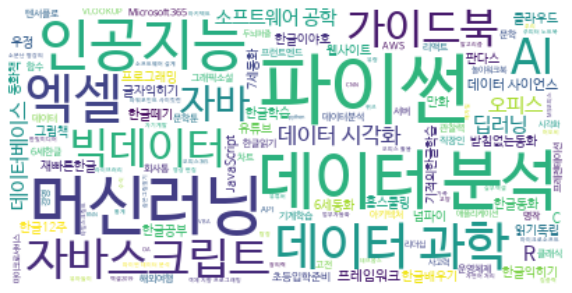

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 단어를 펼쳐서 워드 클라우드 만들어보기

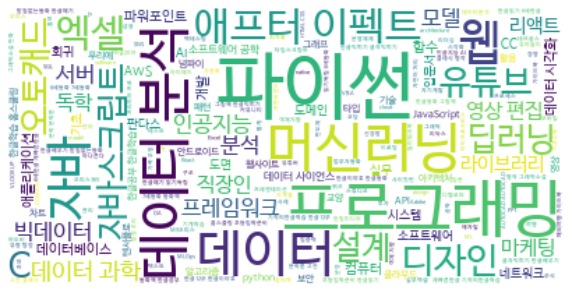

In [ ]:
tag_text=' '.join(tag_list)
wc=WordCloud(background_color='white', random_state=2023, 
             font_path=font_path,max_words=500)
wc=wc.generate(tag_text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()